<a href="https://colab.research.google.com/github/DanilNaum/numeral_methods_3rd_cours_task2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10.  $f(x) = x^2 + 4 ⋅ sin x − 2$

---

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
with open("input.txt",'w') as file:
  file.write('n'+'\t'+'max_delta_xs' +'\t'+ 'max_delta_xs_opt'+'\n')
a, b = -3, 3
f = lambda x: x**2 + 4 * np.sin(x) - 2

In [90]:
def Lagrange(x, xs, fs):
    res = 0
    for i in range(len(xs)):
        num, den = 1, 1
        for x_j in xs[:i]+xs[i+1:]:
            num *= x - x_j
            den *= xs[i] - x_j
        res += (num/den) * fs[i]
    return res

In [91]:
def plot_func():
  fig, ax = plt.subplots()
  ax.set_title('$f(x) = x^2 + 4* sin x − 2$')
  x = np.linspace(a, b, 100)
  plt.plot(x, f(x))
  plt.show()

In [92]:
def points(a,b,n,f):
  xs = list(np.linspace(a, b, n))
  fs = [f(x) for x in xs]
  xs_opt = [0.5* ((a + b) + (b - a) * np.cos(2 * (i - 1) * np.pi /(2 * n))) for i in range(1,n+1)]
  fs_opt = [f(x) for x in xs_opt]
  return xs,fs,xs_opt,fs_opt

In [93]:
def plot_func_with_points(f,xs,fs,xs_opt,fs_opt, n):
  fig, ax = plt.subplots()
  ax.set_title('$f(x) = x^2 + 4* sin x − 2$' + ', n = '+str(n))
  x = np.linspace(a, b, 100)
  plt.plot(x, f(x),xs,fs,'g:o',xs_opt,fs_opt,'y:o')
  plt.legend(['f(x)', 'xs','xs_opt'])
  plt.show()
  

In [94]:
def plot_Lagrange_delta(xs,fs,f,opt,n):
  fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
  fig.set_figheight(5)
  fig.set_figwidth(15)
  ax1.set_title('f(x), n = '+str(n))
  ax2.set_title('delta f(x)')

  x = list(np.linspace(a, b, 100))
  fx = [f(xi) for xi in x]
  ax1.plot(x, fx);
  f_xs = [Lagrange(x1, xs, fs) for x1 in x ]
  ax1.plot(x, f_xs,'.')
  if opt == False: ax1.legend(['f(x)', 'L(xs)'])
  else: ax1.legend(['f(x)', 'L(xs_opt)'])
  delta = [abs(f_xs[i]-fx[i]) for i in range(len(f_xs))]
  ax2.plot(x, delta);
  return max(delta)

In [95]:
def All_plots(n):
  # plot_func()
  xs,fs,xs_opt,fs_opt = points(a,b,n,f)
  plot_func_with_points(f,xs,fs,xs_opt,fs_opt, n)
  max_delta_xs = plot_Lagrange_delta(xs,fs,f,False,n)
  max_delta_xs_opt = plot_Lagrange_delta(xs_opt,fs_opt,f,True,n)
  with open("input.txt",'a') as file:
    file.write(str(n)+'\t'+str(max_delta_xs) +'\t'+ str(max_delta_xs_opt)+'\n')
  # print(n,max_delta_xs,max_delta_xs_opt )

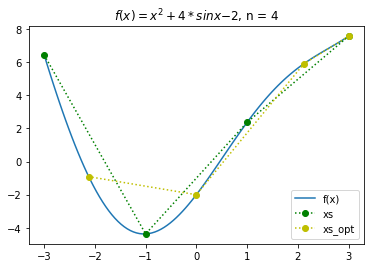

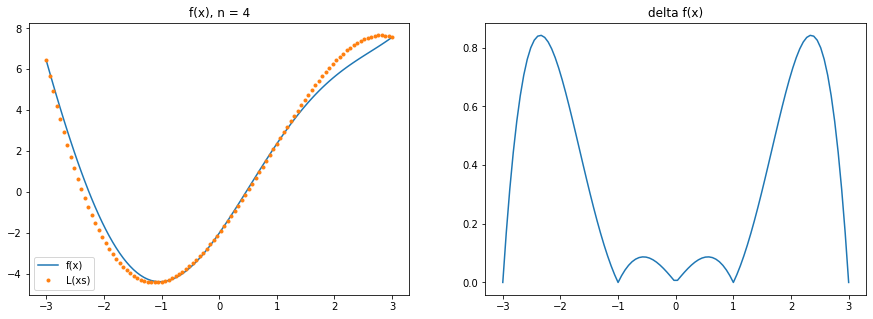

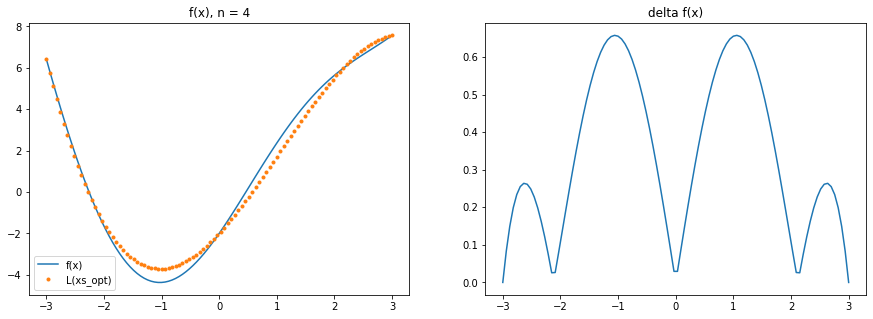

In [96]:
All_plots(4)

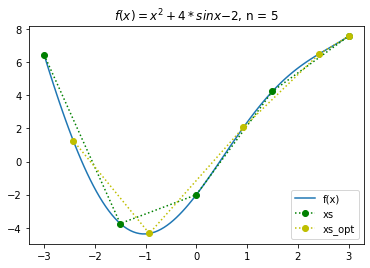

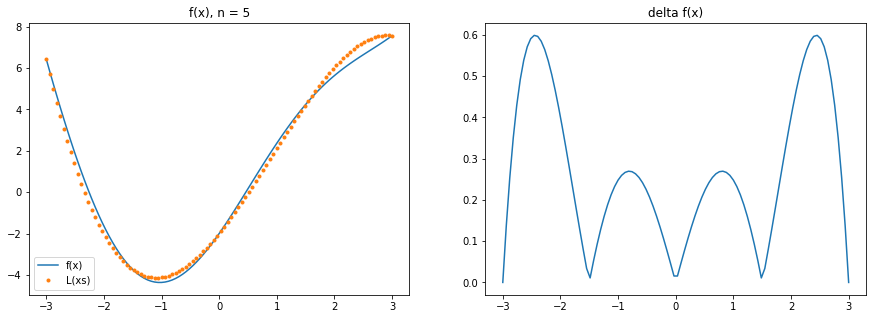

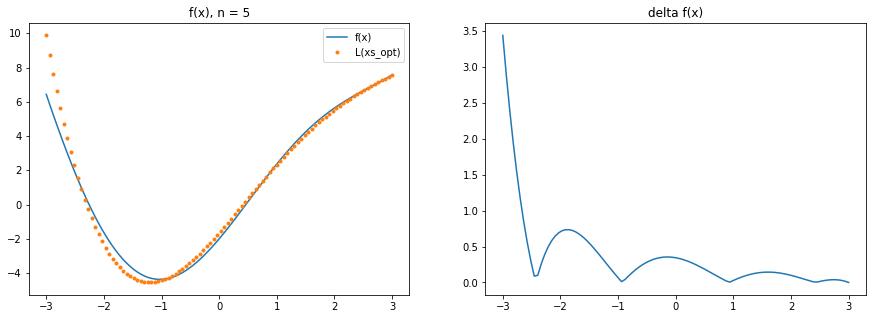

In [97]:
All_plots(5)

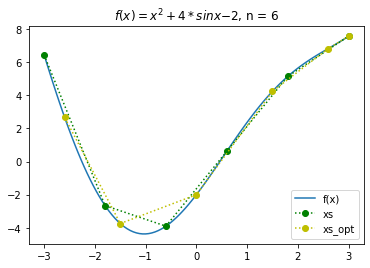

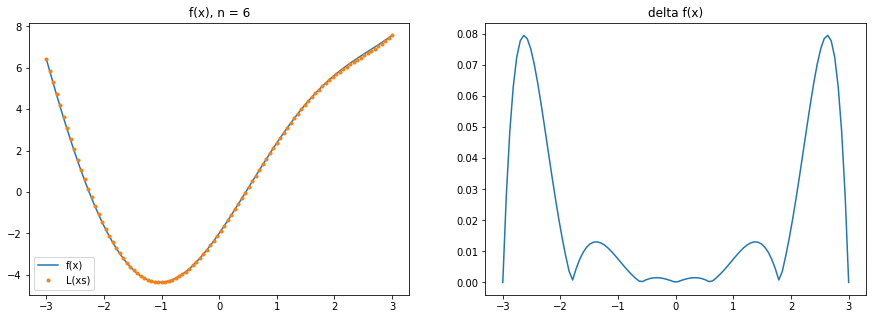

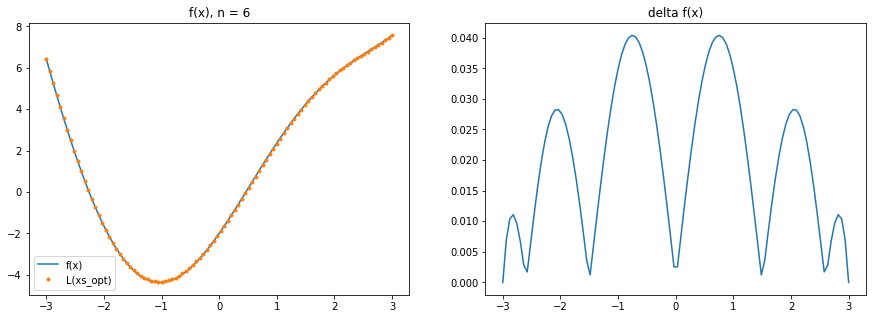

In [98]:
All_plots(6)

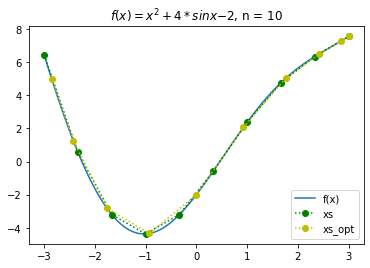

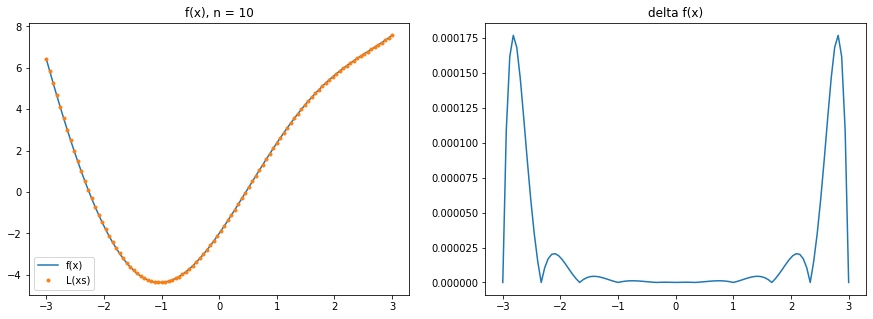

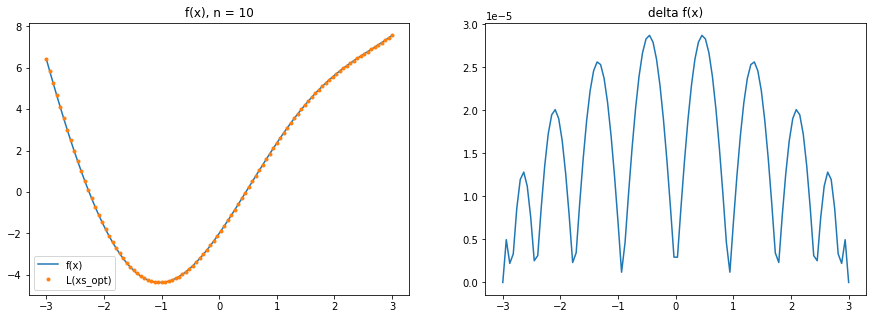

In [99]:
All_plots(10)

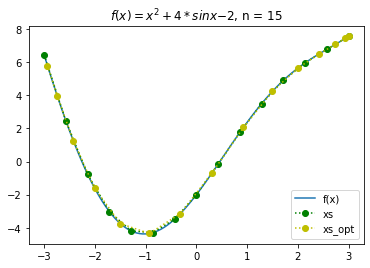

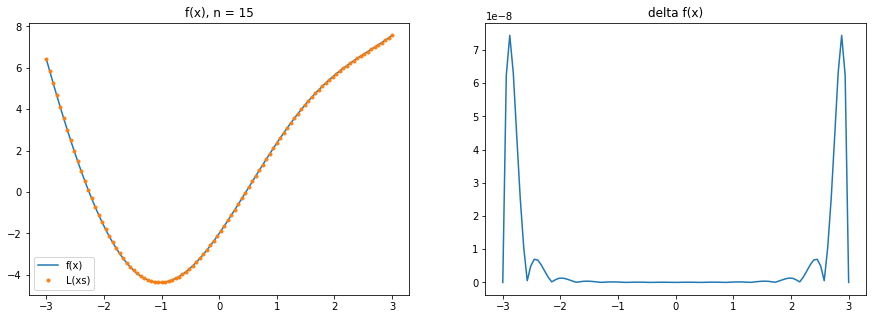

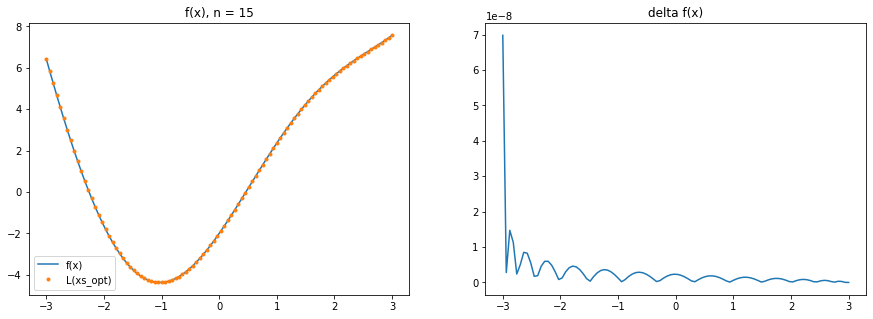

In [100]:
All_plots(15)